This notebook reproduces [Ole Peters](https://twitter.com/ole_b_peters)' surprising example from his illuminating [TED talk](https://www.youtube.com/watch?v=LGqOH3sYmQA) about ergodicity.

So say you have **100€** and someone suggests you play the following game. If a coin toss is **heads** then you are given an extra **50%** on top of your current amount. If it's tails then **40%** is taken away. Play multiple times and say you *won* if you end up with more than the 100€ you started with and you *lose* if you end up with less.

Would you play the game? Well let's see. What might the sequence look like over 6 coin tosses?

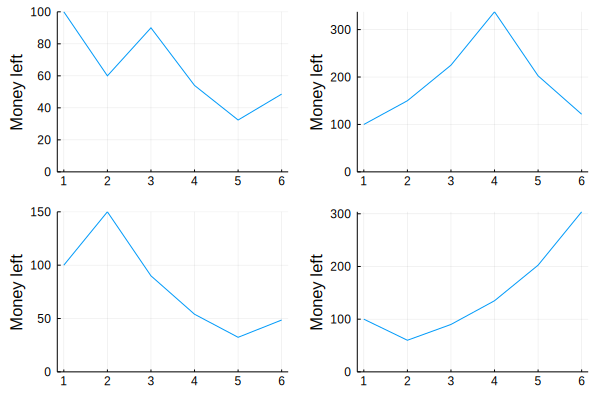

In [1]:
using Plots, Random
Random.seed!(12) # Make the sheet reproducible

function sequence(n) 
    w=[100.0] # Initial wealth

    for i in 2:n
        push!(w, w[i-1] * (rand() > 0.5 ? 1.5 : 0.6))
    end
    w
end

plot([sequence(6) for i in 1:4], ylims=(0,Inf), ylabel="Money left", leg=:none, layout=4)

You can see 4 sample results, some are winning and others are losing. Are they typical? We want to see lots of them, say 100, to find out. We also want to see the **average** over all the trajectories at each time step and show that too.

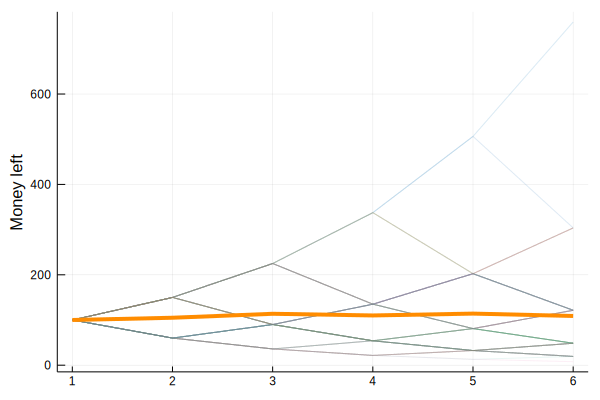

In [2]:
ensemble = [sequence(6) for j in 1:100]
average = sum(ensemble, dims=1)/100

plot(ensemble, alpha=0.1, leg=:none)
plot!(average, lw=4, ylabel="Money left", lc=:darkorange)

We start to get an idea of how this sequence evolves, it seems to spread out over time and some of the trajectories are winning and some of the trajectories are losing. The average looks like it is starting to show an upward trend.

So should we play the game or not? 

Well let's play it out more times (say 1000 times) and over a longer time frame, say 60 steps.

(Since the numbers get very big and very small over this time frame we'll switch to an exponential scaling of the y-axis.)

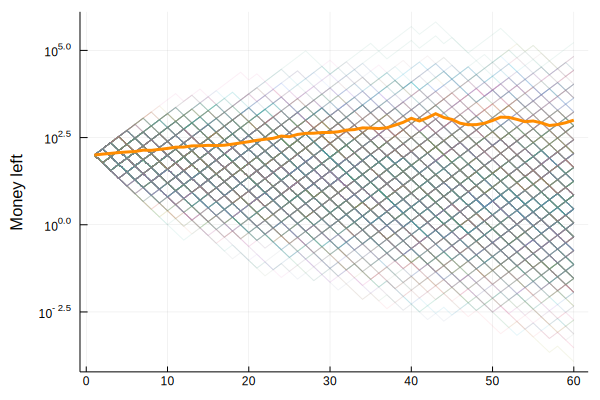

In [3]:
ensemble = [sequence(60) for j in 1:1000]
average = sum(ensemble, dims=1)/1000

plot(ensemble, alpha=0.1, ylabel="Money left", yscale=:log10, leg=:none)
plot!(average, lw=3, lc=:darkorange)

Seems promising, the *average* does indeed trend upwards over time. 

So we should definitely play, right? 

Well you might be getting an inkling of where this is going. Take a look at the other trajectories, most of them are below the average. It looks like it's "overemphasising the rare exceptions" above the average. 

Let's take a different tack and see what happens if the trajectories are allowed to run over an even longer period, say 6000 time steps.

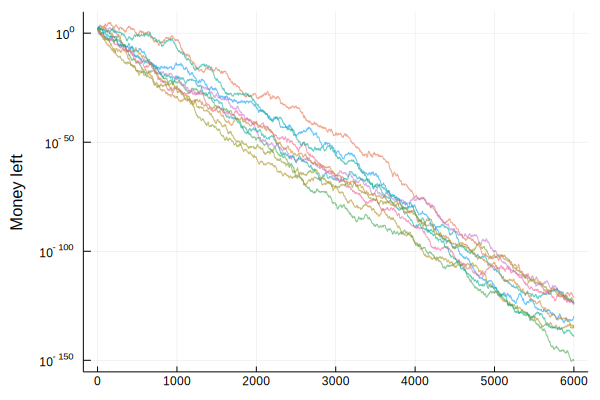

In [4]:
ensemble = [sequence(6000) for j in 1:10]
plot(ensemble, alpha=0.6, ylabel="Money left", yscale=:log10, leg=:none)

Now we can clearly see that the trend is overwhelmingly downwards. Indeed it definitely would **not** be good to play this game over a long period of time. You have a vanishingly small chance of not losing all your money.

This is an example of where the time average of the game is not the same as the naïve statistical average over multiple trajectories; The game is non-[ergodic](https://en.wikipedia.org/wiki/Ergodicity).

The way I'm looking at this is that the ensemble average:
1. is unrealistic in an economic sense because you can only ever see your own, single reality. It is OK in thermodynamics because there are so many particles and degrees of freedom that ergodicity can be assumed.
2. loses information about the distribution of random motions and gives exceptional cases too much weight. In multiplicative evolutions (like this one or any involving proportional returns) the average will be skewed.

To go deeper first watch Ole's [TED talk](https://www.youtube.com/watch?v=LGqOH3sYmQA) and then [read this article](https://www.nature.com/articles/s41567-019-0732-0) where he goes through this example in more detail, then see his research papers, for example: [Ergodicity Breaking in Geometric Brownian Motion](https://www.researchgate.net/publication/236073111_Ergodicity_Breaking_in_Geometric_Brownian_Motion).